# Challenge 2: Kernel Ridge Regression and Kernel PCA

<a target="_blank" href="https://colab.research.google.com/github/GaiaSaveri/intro-to-ml/blob/main/notebooks/challenge-two.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

The challenge is to show why it is better (or not) to use kernelised methods in two toy data sets, and find out which kernel is the most suitable for each.
There are two main tasks:
1. Ridge Regression vs Kernel Ridge Regression
2. PCA vs Kernel PCA

Tip: *for the whole challenge, you can use ```sklearn```.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from scipy import linalg as LA
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
from sklearn.datasets import make_classification

## 1. Ridge Regression
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a linear Ridge Regression model;
* Fit a Kernel Ridge Regression model with a Gaussian kernel and one with a Polynomial kernel. Through a grid search, see how different values for gamma for the Gaussian, and different degrees and values for the regularisation term for the Polynomial, change the line that gets fitted by the model.
Lastly, fit one last KRR with the best kernel and best parameters that you found (the ones that minimise the test error).

For each subtask, calculate the RMSE on the test data set and plot a visual representation of each fitted line, also when trying different values for the parameters.

In [ ]:
# create training dataset
train_points = 20
eps = np.random.normal(0, 1, train_points)

X_train = np.linspace(-5, 5, train_points)
y_train = (X_train+4) * (X_train+1) * (np.cos(X_train)-1) * (X_train-3) + eps

X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

# create testing data set
test_points = 1000

X_test = np.linspace(-5, 5, test_points)
y_test = (X_test+4) * (X_test+1) * (np.cos(X_test)-1) * (X_test-3)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

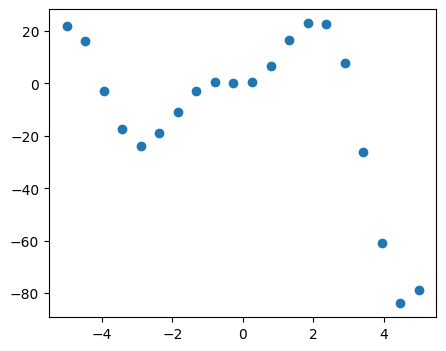

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(X_train, y_train, 'o')
plt.show()

MSE: 719.2149134876709


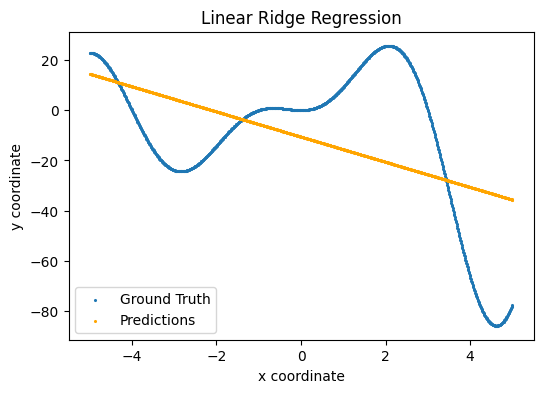

In [ ]:
# Ridge Regression model
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('MSE:', mse)

plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label='Ground Truth', s=1.5)
plt.scatter(X_test, y_pred, color='orange', label='Predictions', s=1.5)
plt.title('Linear Ridge Regression')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.legend()
plt.show()

MSE: 92.60945033866709


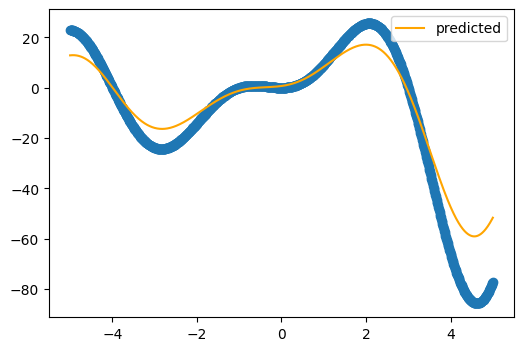

In [ ]:
# Kernel Ridge Regression model with Gaussian kernel
krr = KernelRidge(alpha=1.0, gamma=1, kernel = 'rbf')
krr.fit(X_train, y_train)
y_pred_sk = krr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_sk)
print('MSE:', mse)

plt.figure(figsize=(6,4))
plt.plot(X_test[:,0], y_test, 'o')
plt.plot(X_test[:,0], y_pred_sk, label='predicted', c='orange')
plt.legend()
plt.show()

MSE: 101.33832841342408


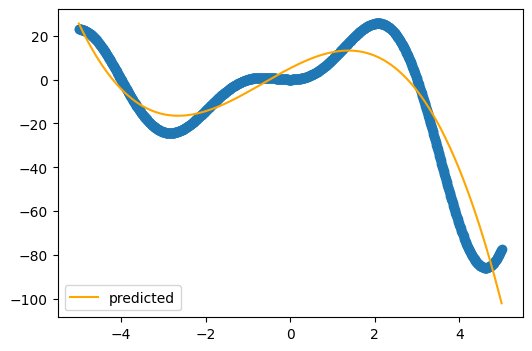

In [ ]:
# # Kernel Ridge Regression model with Polynomial kernel
krr = KernelRidge(alpha=1.0, kernel = 'polynomial')
krr.fit(X_train, y_train)
y_pred_sk = krr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_sk)
print('MSE:', mse)

plt.figure(figsize=(6,4))
plt.plot(X_test[:,0], y_test, 'o')
plt.plot(X_test[:,0], y_pred_sk, label='predicted', c='orange')
plt.legend()
plt.show()

MSE with 0.1 as gamma: 241.8919863624619
MSE with 0.5 as gamma: 94.52326580767529
MSE with 0.75 as gamma: 90.08600658864017
MSE with 1.0 as gamma: 92.60945033866709
MSE with 1.25 as gamma: 97.21987051850961
MSE with 1.5 as gamma: 102.56171950124576
MSE with 2.0 as gamma: 113.76164644038205
MSE with 2.5 as gamma: 124.77362326534298
MSE with 3.0 as gamma: 135.31512362975604


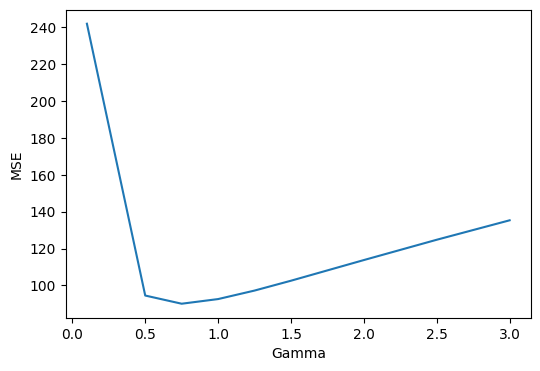

In [ ]:
# Tuning of gamma
test_mse = []
gam = [0.10, 0.50, 0.75, 1.00, 1.25, 1.50, 2.00, 2.5, 3.00]
for i in gam:

    krr = KernelRidge(alpha=1.0, gamma=i, kernel = 'rbf')
    krr.fit(X_train, y_train)
    y_pred_sk = krr.predict(X_test)

    iter_test_mse = mean_squared_error(y_test, y_pred_sk)
    test_mse.append(iter_test_mse)
    print('MSE with', i, 'as gamma:', iter_test_mse)

plt.figure(figsize=(6,4))
plt.plot(gam, test_mse)
plt.xlabel('Gamma')
plt.ylabel('MSE')
plt.show()

Best fit polynomial degree:  10
MSE:  0.7364786373477702


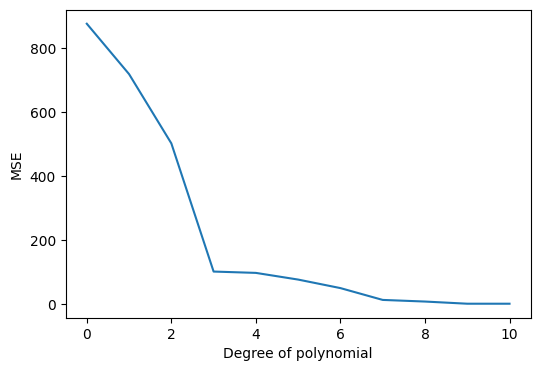

In [ ]:
# Tuning of degree
test_mse = []
deg = [i for i in range(0,11)]
for i in deg:

    krr = KernelRidge(alpha=1.0, degree=i, kernel = 'polynomial')
    krr.fit(X_train, y_train)
    y_pred_sk = krr.predict(X_test)

    iter_test_mse = mean_squared_error(y_test, y_pred_sk)
    test_mse.append(iter_test_mse)

print("Best fit polynomial degree: ", test_mse.index(min(test_mse)))
print('MSE: ', min(test_mse))

plt.figure(figsize=(6,4))
plt.plot(deg, test_mse)
plt.xlabel('Degree of polynomial')
plt.ylabel('MSE')
plt.show()

MSE with 0.1 as regularization term: 0.7541188466954046
MSE with 0.5 as regularization term: 0.7438882094599476
MSE with 0.75 as regularization term: 0.7401181831019046
MSE with 1.0 as regularization term: 0.7364786373477702
MSE with 1.25 as regularization term: 0.7334342401727806
MSE with 1.5 as regularization term: 0.7307498472302991
MSE with 2.0 as regularization term: 0.7261316034205593
MSE with 2.5 as regularization term: 0.7224473509461871
MSE with 3 as regularization term: 0.7195400948041605


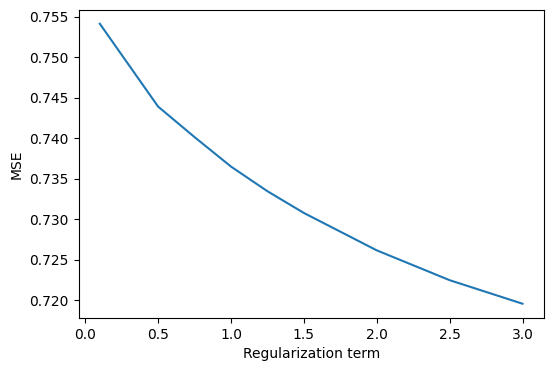

In [ ]:
# Tuning of alpha
test_mse = []
a = [0.10, 0.50, 0.75, 1.00, 1.25, 1.50, 2.00, 2.5, 3]
for i in a:

    krr = KernelRidge(alpha=i, degree=10, kernel = 'polynomial')
    krr.fit(X_train, y_train)
    y_pred_sk = krr.predict(X_test)

    iter_test_mse = mean_squared_error(y_test, y_pred_sk)
    test_mse.append(iter_test_mse)
    print('MSE with', i, 'as regularization term:', iter_test_mse)

plt.figure(figsize=(6,4))
plt.plot(a, test_mse)
plt.xlabel('Regularization term')
plt.ylabel('MSE')
plt.show()

0.7261316034205593


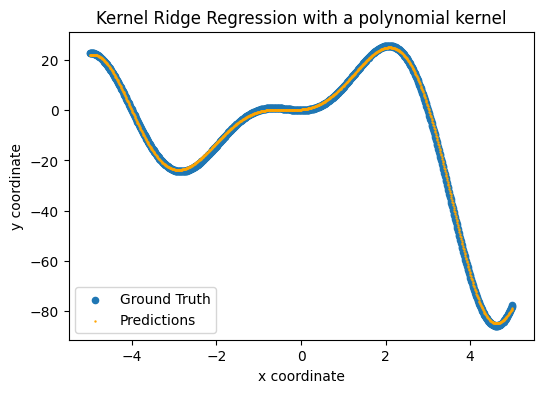

In [ ]:
# Best fit
krr = KernelRidge(alpha=2, degree=10, kernel = 'polynomial')
krr.fit(X_train, y_train)
y_pred_sk = krr.predict(X_test)

mse = mean_squared_error(y_test, y_pred_sk)
print(mse)

plt.figure(figsize=(6,4))
plt.scatter(X_test, y_test, label='Ground Truth', s=20)
plt.scatter(X_test, y_pred_sk, color='orange', label='Predictions', s=0.5)
plt.title('Kernel Ridge Regression with a polynomial kernel')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.legend()
plt.show()

## 2. PCA
Using the training and test data sets created in the following cell, what you have to do is:
* Fit a PCA model;
* Fit a Kernel PCA model with a kernel of your choice.

For each subtask, plot a visual representation of the projections and verify the accuracy of that kernel on the test data set using SVM.

In [ ]:
X, y = make_circles(n_samples=1000, noise=0.15, factor=0.2, random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=0)

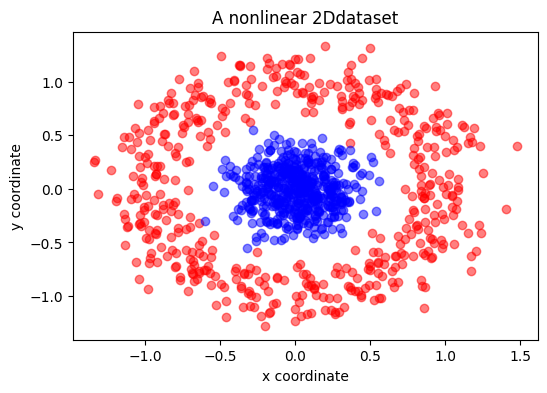

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.title('A nonlinear 2Ddataset')
plt.ylabel('y coordinate')
plt.xlabel('x coordinate')
plt.show()

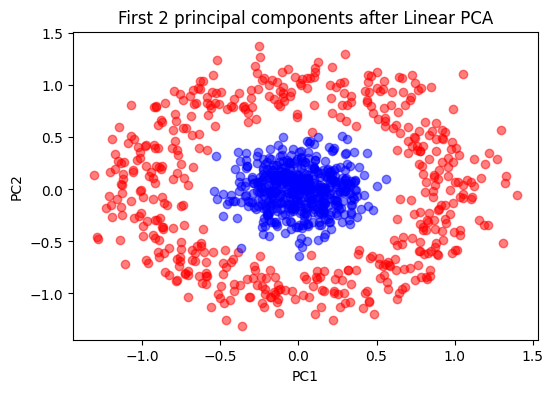

In [ ]:
# PCA with 2 principal components
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_spca[y==0, 0], X_spca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], X_spca[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after Linear PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

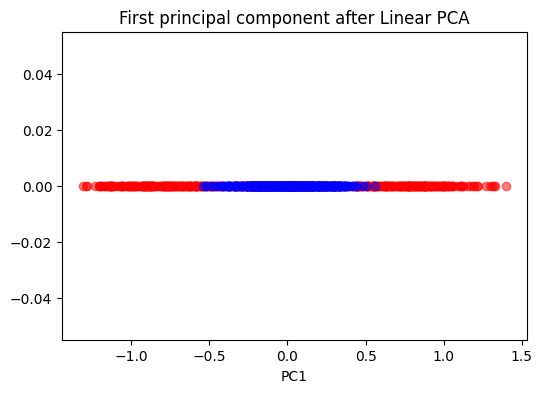

In [ ]:
# PCA with 1 principal component
scikit_pca = PCA(n_components=1)
X_spca = scikit_pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_spca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_spca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

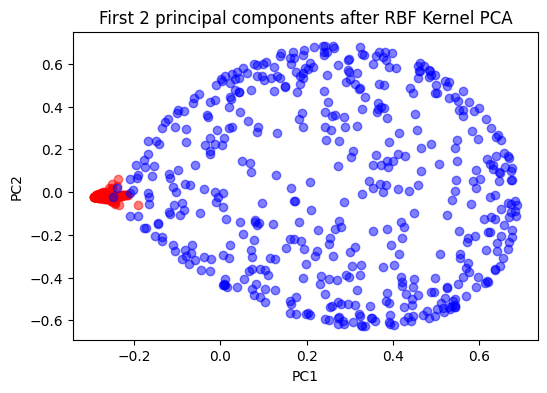

In [ ]:
# Kernel PCA with 2 principal components
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True, alpha=0.5)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

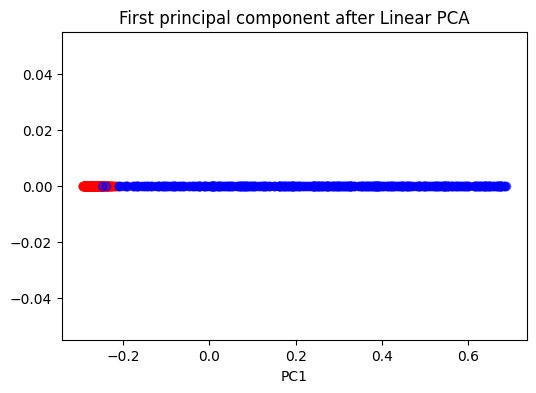

In [ ]:
# Kernel PCA with 1 principal component
kernel_pca = KernelPCA(n_components=1, kernel='rbf', gamma=15, fit_inverse_transform=True, alpha=0.5)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_kpca[y==0, 0], np.zeros((500,1)), color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], np.zeros((500,1)), color='blue', alpha=0.5)
plt.title('First principal component after Linear PCA')
plt.xlabel('PC1')
plt.show()

In [ ]:
# Verify the accuracy using SVM
svc = SVC(kernel='rbf', gamma=15)
svc.fit(X_train, y_train)
y_pred_sk = svc.predict(X_test)
print('Accuracy using SVM: ', accuracy_score(y_test, y_pred_sk))

Accuracy using SVM:  0.992


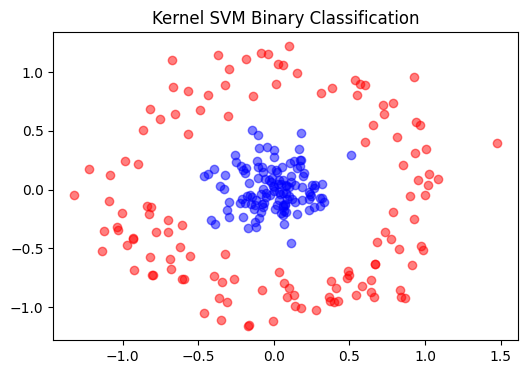

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.5)
plt.title('Kernel SVM Binary Classification')
plt.show()

## 3. PCA pt.2
Repeat the last point of the previous task with a dataset made with ```sklearn.datasets.make_classification()```. Find the best kernel, and comment on your discoveries in the report. What differences do you see with the previous data set?

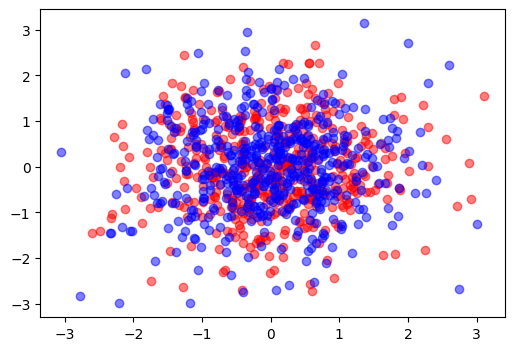

In [ ]:
X, y = make_classification(n_samples=1000, flip_y=0.1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

plt.figure(figsize=(6,4))
plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

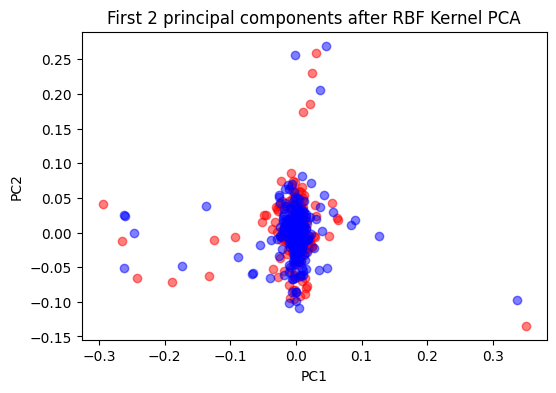

In [ ]:
# Kernel PCA with 2 principal components
kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=15, fit_inverse_transform=True, alpha=0.5)
X_kpca = kernel_pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', alpha=0.5)
plt.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', alpha=0.5)
plt.title('First 2 principal components after RBF Kernel PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
# Verify the accuracy using SVM
svc = SVC(kernel='rbf', gamma=15)
svc.fit(X_train, y_train)
y_pred_sk = svc.predict(X_test)
print('Accuracy using SVM: ', accuracy_score(y_test, y_pred_sk))

Accuracy using SVM:  0.512


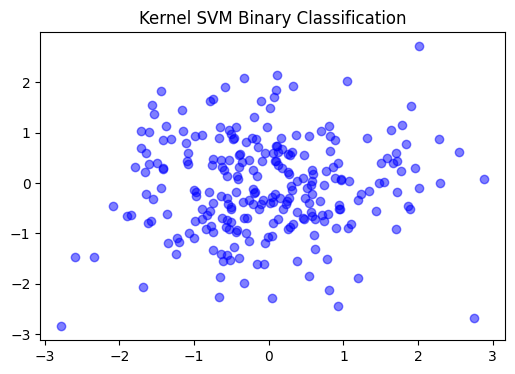

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(X_test[y_pred_sk==0, 0], X_test[y_pred_sk==0, 1], color='red', alpha=0.5)
plt.scatter(X_test[y_pred_sk==1, 0], X_test[y_pred_sk==1, 1], color='blue', alpha=0.5)
plt.title('Kernel SVM Binary Classification')
plt.show()